We are set to explore the kaggle 2020 survey for insights on what is the difference between working for large company vs small company, what is the next tech to learn and how can datascientists better their salary.

In [38]:
# **Data Science Jungle: Large firm or Small Firm;AWS or GCP;Countires with best salaries**

In [39]:
#All imports 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly import subplots
import plotly.figure_factory as ff
import plotly as py
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
import plotly.io as pio
svg_renderer=pio.renderers["svg"]
print(svg_renderer)
pio.renderers.default="svg"

SvgRenderer(width=None, height=None, scale=None, engine='auto')

    Renderer to display figures as static SVG images.  This renderer requires
    either the kaleido package or the orca command-line utility and is broadly
    compatible across IPython environments (classic Jupyter Notebook, JupyterLab,
    QtConsole, VSCode, PyCharm, etc) and nbconvert targets (HTML, PDF, etc.).

    mime type: 'image/svg+xml'
    


In [41]:
#reading csv and see 20k respondents
df=pd.read_csv("data/kaggle_survey_2020_responses.csv")
print("Survey (No of respondents,No of questions answered):",df.shape)

#Let us investigate the list of columns and let us drop second row with questions text
df=df.iloc[1:]

Survey (No of respondents,No of questions answered): (20037, 355)


# **First Question we are tackling is what are the differences encountered in a large firm vs small firm in datascience?**

In [42]:
#check distribution of employess based on the company size
df['Q20'].value_counts(dropna=False)

NaN                         8633
0-49 employees              4208
10,000 or more employees    2238
1000-9,999 employees        1934
50-249 employees            1671
250-999 employees           1352
Name: Q20, dtype: int64

In [43]:
#dropping all NaN in size
df = df[df['Q20'].notna()]
print("Number of respondents with valid company size:",df.shape[0])
df_size=df['Q20'].value_counts(dropna=False)

Number of respondents with valid company size: 11403


In [44]:
#Let us tag each of the company into a bucket based on size
#writing a function to categorise <1000 employees as small and >=1000 as big
def get_corp_type(row):
    if row['Q20']=='0-49 employees':
        return 'small'
    if row['Q20']=='50-249 employees':
        return 'small'
    if row['Q20']=='250-999 employees':
        return 'small'
    if row['Q20']=='1000-9,999 employees':
        return 'big'
    if row['Q20']=='10,000 or more employees':
        return 'big'

df['corp_type'] = df.apply (lambda row: get_corp_type(row), axis=1)
df['corp_type'].value_counts(dropna=False)


small    7231
big      4172
Name: corp_type, dtype: int64

**Are there any difference in titles?**<br>
Answer is we see no big difference in the title used.

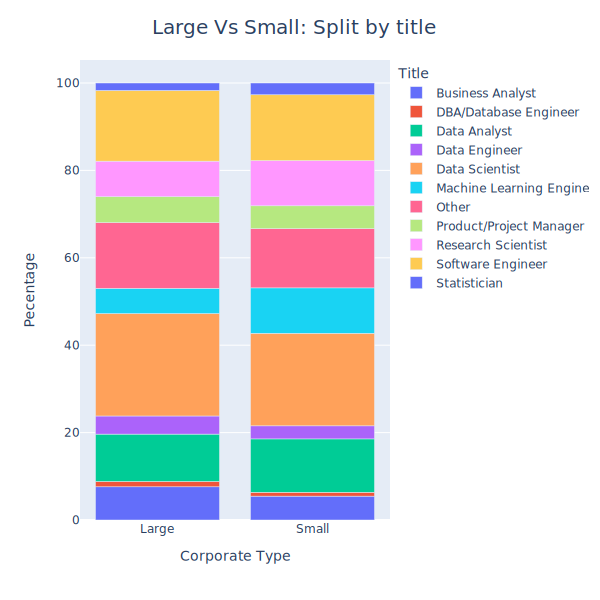

In [45]:
df_title = df.groupby(['corp_type','Q5'], as_index=False).size()

df_title = df_title.pivot(index='Q5',columns='corp_type',values='size')
df_title ['Large']=df_title ['big']/df_title['big'].sum()*100
df_title ['Small']=df_title ['small']/df_title['small'].sum()*100
df_title .reset_index(inplace=True)
df_title =df_title [['Q5', 'Large', 'Small']]
df_title =pd.melt(df_title ,id_vars='Q5', value_name='percent')

fig = px.bar(df_title, x="corp_type", y="percent", color="Q5" ,
    width = 600,
    height = 600)

fig.update_layout(legend_title_text = "Title")
fig.update_xaxes(title_text="Corporate Type")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>Large Vs Small: Split by title</span>"

fig.add_annotation(dict(
                            x= 1.1,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()

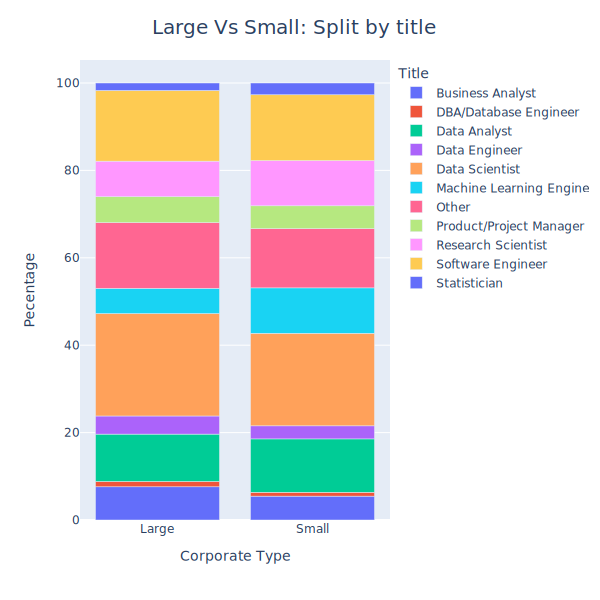

In [47]:
fig.show(format="svg")

In [ ]:
#Function to compare large and small firms
def compare_corp(column):
    df_temp = df.groupby(['corp_type',column]).size().reset_index(name='counts')
    df_temp= df_temp.pivot(index=df_temp.columns[1],columns='corp_type',values='counts')
    df_temp['Large']=df_temp['big']/df_temp['big'].sum()*100
    df_temp['Small']=df_temp['small']/df_temp['small'].sum()*100
    df_temp.reset_index(inplace=True)
    df_temp =df_temp [[column, 'Large', 'Small']]
    df_temp =pd.melt(df_temp ,id_vars=column, value_name='percent')
    return df_temp

**Choice of computing platform**<br>
Local machine is preferred choice. Surprisingly one would have expected small firms to be early adopters of cloud and to keep their fixed costs low. However, Cloud platforms are more prevelant in Large firms than small firms

In [ ]:
df_compute=compare_corp('Q11')

fig = px.bar(df_compute, x="corp_type", y="percent", color="Q11" ,
    width = 700,
    height = 400)

fig.update_layout(legend_title_text = "Platform")
fig.update_xaxes(title_text="Corporate Type")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>Large Vs Small: Compute Platform</span>"

fig.add_annotation(dict(
                            x= 1.5,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()


**ML Maturity**<br>
Large firms  have more models in production for more than two years than the small firms and also less percentage have reported not using any ML methods . That being said, most of the small firms would not have existed two years ago and also good place to start working from scratch in ML as response to question "We are exploring ML methods (and may one day put a model into production)" ratio is high in small firms  compared to large firms

In [ ]:

df_ml=compare_corp('Q22')
fig = px.bar(df_ml, x="Q22", y="percent", color="corp_type" , barmode='group',
    width = 900,
    height = 600)

fig.update_layout(legend_title_text = "Maturity")
fig.update_xaxes(title_text="Corporate Type")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>Large Vs Small: ML Maturity</span>"

fig.add_annotation(dict(
                            x= 1.0,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()



**Language Choice**
Python is the leader of the pack everywhere. R and SQL is more popular in large firms but Javascript and C++ are slightly more popular in small firms. This could also mean Small firms may tend to work more on Edge devices compared to large firms.

In [ ]:
questions = df.columns

def compare_multiple(column):
    qtemp = [question for question in questions if column in question]

    # Creating labels for plot
    column_values = []
    for qn in qtemp:
        for value in df[qn].unique():
             column_values.append(value)

    column_values  = [str.strip(column_value) for column_value  in column_values  if str(column_value)!='nan']
   
    
    df_big=df[df['corp_type']=='big']
    
    big_lang = (df_big.shape[0] - df_big[qtemp].isnull().sum()) / df_big.shape[0]*100
    big_lang.index = column_values

    df_small=df[df['corp_type']=='small']
    small_lang = (df_small.shape[0] - df_small[qtemp].isnull().sum()) / df_small.shape[0]*100
    small_lang.index = column_values
    df_summary=big_lang.to_frame(name = 'Large').join(small_lang.to_frame(name = 'Small'))
    df_summary=df_summary[(df_summary['Large']>=15) | (df_summary['Small']>=15)]
    
    df_summary.reset_index(inplace=True)
    df_summary.columns=[column,'Large','Small']
    df_summary =pd.melt(df_summary ,id_vars=column, value_name='percent')
    return df_summary

df_lang=compare_multiple('Q7')

fig = px.bar(df_lang, x="Q7", y="percent", color="variable" , barmode='group',
    width = 900,
    height = 600)

fig.update_layout(legend_title_text = "Maturity")
fig.update_xaxes(title_text="Corporate Type")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>Large Vs Small: Language Choices</span>"

fig.add_annotation(dict(
                            x= 0.5,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()



Summary <br>
* Thirve in place where ML and cloud adoption is mature with standard languages? Head to large firms
* Want to get your hands dirty in protyping and cloud configuration with non traditional ML languages too? Small firms are your best bet

# Second question: What is the future tech to learn? AWS or Google Cloud

Python is still overwhelmingly recommended language to aspiring data scientists

In [ ]:
#reading again csv 
df=pd.read_csv("data/kaggle_survey_2020_responses.csv")
print("Survey (No of respondents,No of questions answered):",df.shape)

#let us drop second row with questions text
df=df.iloc[1:]
df['Q8'].value_counts(dropna=True)

What is the cloud platform data world is keen to get more familiar in next two years?
Amazon and Google are neck to neck in their offerings

In [ ]:
#Function to pick all columns beginning with particular Question number
def filter_col_startswith(column):
    filter_col = [col for col in df if col.startswith(column)]
    return filter_col

In [ ]:
#Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

df_temp=df[filter_col_startswith('Q26_B_')].apply(pd.Series.value_counts).sum(axis=1).to_frame().reset_index()
df_temp.columns = ['Cloud Platform','No of Respondents']
df_temp.sort_values(by=['No of Respondents'], ascending=False,inplace=True)

fig = px.bar(df_temp, x="Cloud Platform", y="No of Respondents",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="Cloud Platform")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>Cloud Platform Kagglers wish to learn</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()

In [ ]:
#In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?

df_temp=df[filter_col_startswith('Q27_B_')].apply(pd.Series.value_counts).sum(axis=1).to_frame().reset_index()
df_temp.columns = ['Cloud Product','No of Respondents']
df_temp.sort_values(by=['No of Respondents'], ascending=False,inplace=True)

fig = px.bar(df_temp, x="Cloud Product", y="No of Respondents",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="Cloud Product")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>Cloud Product Kagglers wish to learn</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()

In [ ]:
#In the next 2 years, do you hope to become more familiar with any of these specific machine learning products?

df_temp=df[filter_col_startswith('Q28_B_')].apply(pd.Series.value_counts).sum(axis=1).to_frame().reset_index()
df_temp.columns = ['ML Product','No of Respondents']
df_temp.sort_values(by=['No of Respondents'], ascending=False,inplace=True)
fig = px.bar(df_temp, x="ML Product", y="No of Respondents",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="ML Product")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>ML Product Kagglers wish to learn</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()

In [ ]:
#In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)
df_temp=df[filter_col_startswith('Q35_B_')].apply(pd.Series.value_counts).sum(axis=1).to_frame().reset_index()
df_temp.columns = ['ML Experiment Tool','No of Respondents']
df_temp.sort_values(by=['No of Respondents'], ascending=False,inplace=True)
fig = px.bar(df_temp, x="ML Experiment Tool", y="No of Respondents",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="ML Experiment Tool")
fig.update_yaxes(title_text="Pecentage")

large_title_format = "<span style='font-size:20px; '>ML Experiment Tool Kagglers wish to learn</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()


**Summary**
AWS is leading in preferred cloud platform. However, Google beats hands down Amazon with  its imnpressive ecoystem starting with Google Compute, Google AI Platform and Tensorboard. Google seems to be an favorite over AWS atleast among Kagglers.

# Third: What are the factors that influence the salary adjusted for cost of living?

In [ ]:
#resetting the dataframes
df=pd.read_csv("data/kaggle_survey_2020_responses.csv")
df_livingcost=pd.read_csv("data/cost of living 2020.csv")

In [ ]:
print(df.columns)
df=df.iloc[1:]

In [ ]:
#Salary, Country, Experience, Programming lang,
df=df[['Q6','Q24','Q3','Q8','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11']]

In [ ]:
#drop all nas in salary,country,experience
df=df[df['Q6'].notna()]
df=df[df['Q24'].notna()]
df=df[df['Q3'].notna()]

In [ ]:
df['Q24'].replace({'100,000-124,999':112000,
                     '15,000-19,999':17500,
                     '70,000-79,999':75000,
                     '30,000-39,999':35000,
                     '90,000-99,999':95000,
                     '1,000-1,999':1500,
                     '150,000-199,999':175000,
                     '60,000-69,999':65000,
                     '4,000-4,999':4500,
                     '> $500,000':500000,
                     '300,000-500,000':400000,
                     '40,000-49,999':45000,
                     '25,000-29,999':27500,
                     '80,000-89,999':85000,
                     '7,500-9,999':8750,
                     '50,000-59,999':55000,
                     '250,000-299,999':275000,
                     '5,000-7,499':6250,
                     '2,000-2,999':2500,
                     '20,000-24,999':22500,
                     '200,000-249,999':225000,
                     '3,000-3,999':3500,
                     '$0-999':750,
                     '10,000-14,999':12500,
                     '125,000-149,999':137000,
                    
                    }, inplace=True)

In [ ]:
#merging with living cost data
df=pd.merge(df,df_livingcost, how='left', left_on='Q3', right_on='Country')
df=df[df['Q3']!='Other']

In [ ]:
#checking descriptive stats of the adjusted salary and 
df['adjusted_salary']=df['Q24']/(df['Cost of Living Index']/100)
print(df.agg(       {
            "adjusted_salary": ["min", "max", "median", "skew"]
       }
))

print(df['adjusted_salary'].dropna().quantile([0.0,.1,.2, .5, .90, .95]))

#dropping bottom 10 percentile as they seem unrealistic even after adjusting for cost of living
df=df[df['adjusted_salary']> 2495.840266]
#applying log transformation to reduce the right skewness
df['adjusted_salary']=np.log(df['adjusted_salary'])

In [ ]:
df=df[['Q6','Q3','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','adjusted_salary']]

In [ ]:
#convert categorical vlaues into dummy variables and picking t
exp= pd.get_dummies(df['Q6'], prefix='exp', drop_first=True,dummy_na=True)
ct = pd.get_dummies(df['Q3'], prefix='ct', drop_first=True,dummy_na=True)
python= pd.get_dummies(df['Q7_Part_1'], drop_first=True,dummy_na=True)
r= pd.get_dummies(df['Q7_Part_2'], drop_first=True,dummy_na=True)
sql= pd.get_dummies(df['Q7_Part_3'], drop_first=True,dummy_na=True)
c= pd.get_dummies(df['Q7_Part_4'], drop_first=True,dummy_na=True)
cplusplus= pd.get_dummies(df['Q7_Part_5'], drop_first=True,dummy_na=True)
java= pd.get_dummies(df['Q7_Part_6'], drop_first=True,dummy_na=True)
javascript= pd.get_dummies(df['Q7_Part_7'], drop_first=True,dummy_na=True)
julia= pd.get_dummies(df['Q7_Part_8'], drop_first=True,dummy_na=True)
swift= pd.get_dummies(df['Q7_Part_9'], drop_first=True,dummy_na=True)
bash= pd.get_dummies(df['Q7_Part_10'], drop_first=True,dummy_na=True)
matlab= pd.get_dummies(df['Q7_Part_11'], drop_first=True,dummy_na=True)


In [ ]:
#creating the final dataset for linear regression
df_processed=pd.concat([python,r,sql,c,cplusplus,java,javascript,julia,swift,bash,matlab ],axis=1)
df_processed.columns =['lang_python','lang_r','lang_sql','lang_c','lang_cplusplus','lang_java','lang_javascript','lang_julia','lang_swift','lang_bash','lang_matlab']
df_processed=pd.concat([df['adjusted_salary'],exp,ct,df_processed],axis=1)
df_processed=df_processed.drop('exp_nan',axis=1)
df_processed=df_processed.drop('ct_nan',axis=1)

In [ ]:
#linear regression from scikit
X=df_processed.drop('adjusted_salary',axis=1)
y=df_processed['adjusted_salary']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
#printing the coefficients
print(linreg.intercept_)
print(linreg.score(X,y))

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linreg.coef_))], axis = 1)
coefficients.to_csv('coefficients.csv',index=False)

In [ ]:
coefficients.columns=['Variable','Coefficient']


In [ ]:
#Function to pick all columns beginning with particular string
def filter_row_startswith(df,column,keyword,sortcolumn):
    filter_row = df[df[column].str.startswith(keyword)]
    return filter_row.sort_values(by=sortcolumn,ascending=False).head(10)

In [ ]:
#plotting to map coefficients - Experience
df_temp=filter_row_startswith(coefficients,'Variable','exp','Coefficient')
fig = px.bar(df_temp, x="Variable", y="Coefficient",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="Experience")
fig.update_yaxes(title_text="Coefficient")

large_title_format = "<span style='font-size:20px; '>Top paid kagglers based on Experience</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()




In [ ]:
#plotting to map coefficients - Country
df_temp=filter_row_startswith(coefficients,'Variable','ct','Coefficient')
fig = px.bar(df_temp, x="Variable", y="Coefficient",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="Country")
fig.update_yaxes(title_text="Coefficient")

large_title_format = "<span style='font-size:20px; '>Top paid kagglers based on country</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()


In [ ]:
#plotting to map coefficients - Language
df_temp=filter_row_startswith(coefficients,'Variable','lang','Coefficient')
fig = px.bar(df_temp, x="Variable", y="Coefficient",
    width = 600,
    height = 600)


fig.update_xaxes(title_text="Language")
fig.update_yaxes(title_text="Coefficient")

large_title_format = "<span style='font-size:20px; '>Top paid kagglers based on Language</span>"

fig.add_annotation(dict(
                            x= 0.8,
                            y=1.1,
                            showarrow=False,
                            text= large_title_format + "<br><br>" ,
                            textangle=0,
                            xref="paper",
                            yref="paper"
                           ))
fig.show()

**Summary 3**<br>
Experienced personnel as expected earn more. In terms of country, USA and UAE top the list of better pay even after adjusting for cost of living. Python being common for almost 90% of people,C and Matlab top the list. One reason is they could be top choice for people with high experience as well.

# Appendix
1. https://www.kaggle.com/joeypp/cost-of-living-numbeo-dataset
2. https://www.kaggle.com/spitfire2nd/enthusiast-to-data-professional-what-changes/
3. https://www.kaggle.com/kailex/education-languages-and-salary


In [ ]:
#Testing for R2 
df_processed.columns = [c.replace(' ', '') for c in df_processed.columns]
df_processed.columns = [str(c).lower() for c in df_processed.columns]
df_processed.columns = [c.replace('<', '') for c in df_processed.columns]
df_processed.columns = [c.replace('-', '') for c in df_processed.columns]
df_processed.columns = [c.replace('+', '') for c in df_processed.columns]

str1 = df_processed.columns[0] + " ~ " + " + ".join(list(df_processed.columns[1:len(df_processed.columns)]))
model = ols(formula=str1,data=df_processed).fit()
model.summary()